In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from utils_all import *

/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load and clean data

In [3]:
%store -r data

In [50]:
data.shape

(150388, 297)

In [52]:
data[data.meta_name == 'startDate'].shape

(49131, 297)

In [4]:
data.head()

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,white-space,-webkit-box-lines,-webkit-animation-name,-webkit-align-items,page-break-inside,-webkit-grid-auto-rows,-webkit-clip-path,max-height,stroke-width,buffered-rendering
0,http://www.blu.fm/events/54114-Klubnacht-2016-...,name,NaN,0,0,0,0,meta,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto
1,http://www.blu.fm/events/54114-Klubnacht-2016-...,startDate,02.04.2016 23:59,5,342,16,110,time,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto
2,http://www.blu.fm/events/54114-Klubnacht-2016-...,location,Berghain ...,5,362,36,390,p,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto
3,http://www.blu.fm/events/54114-Klubnacht-2016-...,location,StandortBerghain ...,29,554,73,342,p,NaN,7,...,normal,single,none,stretch,auto,auto,none,none,1,auto
4,http://www.blu.fm/events/54114-Klubnacht-2016-...,startDate,02.04.2016 23:59,5,342,16,110,time,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto


Clean data (remove rows with mets tag, ZERO width, height, x and y coordinates)

In [5]:
df = clean_df(data)

In [53]:
df.shape

(27615, 298)

In [54]:
df[df.meta_name == 'startDate'].shape

(5811, 298)

In [7]:
df.columns

Index(['url', 'meta_name', 'text', 'x_coords', 'y_coords', 'block_height',
       'block_width', 'tag', 'num_child', 'num_siblings',
       ...
       'white-space', '-webkit-box-lines', '-webkit-animation-name',
       '-webkit-align-items', 'page-break-inside', '-webkit-grid-auto-rows',
       '-webkit-clip-path', 'max-height', 'stroke-width',
       'buffered-rendering'],
      dtype='object', length=297)

## Pages with one event

Number of unique urls

In [8]:
len(df.url.unique())

17011

Number of events per one url

In [9]:
df_sdate = df[df.meta_name == 'startDate']

In [10]:
df_sdate.head()

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,white-space,-webkit-box-lines,-webkit-animation-name,-webkit-align-items,page-break-inside,-webkit-grid-auto-rows,-webkit-clip-path,max-height,stroke-width,buffered-rendering
1,http://www.blu.fm/events/54114-Klubnacht-2016-...,startDate,02.04.2016 23:59,5,342,16,110,time,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto
61,http://www.laduenews.com/calendar/charitable_f...,startDate,"Saturday, October 18th, 2014 @ 6:20 pm",15,362,41,354,time,NaN,3,...,normal,single,none,stretch,auto,auto,none,none,1,auto
66,http://www.lbchamber.com/events/details/the-be...,startDate,"October 31, 2016",102,756,20,133,span,NaN,2,...,normal,single,none,stretch,auto,auto,none,none,1,auto
88,http://www.southwestorlandobulletin.com/?optio...,startDate,2:00 PM-6:00 PM,318,6595,198,40,span,NaN,1,...,normal,single,none,stretch,auto,auto,none,none,1,auto
103,http://www.livenation.com/events/155446-oct-26...,startDate,"Friday Oct 26, 2012at09:00 PM CDT",51,481,22,75,span,NaN,4,...,normal,single,none,stretch,auto,auto,none,none,1,auto


In [11]:
sdate_unique = df_sdate.url.value_counts().reset_index()
sdate_unique.columns = ['url', 'count_dates']

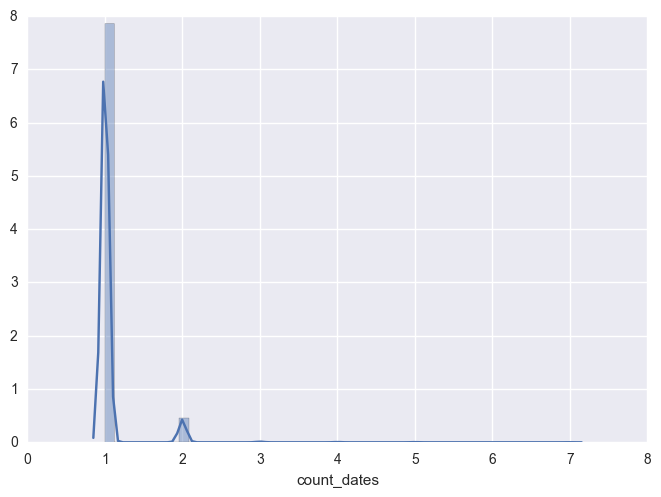

In [12]:
sns.distplot(sdate_unique.count_dates)

Number of pages with 1 event

In [13]:
len(sdate_unique[sdate_unique.count_dates == 1])

5158

Number of events with more than 1 events

In [14]:
len(sdate_unique[sdate_unique.count_dates > 1])

311

Urls only with one event

In [15]:
urls_1 = sdate_unique[sdate_unique.count_dates == 1].url

In [16]:
urls_1.head()

311    http://www.ticketbis.com/ar/entradas-disney-on...
312       https://runsignup.com/Race/FL/Naples/Coconut5K
313    http://torino.virgilio.it/eventi/torna-il-job-...
314     https://www.contender.com/barry-manilow-setlists
315                  http://forneychamber.com/?q=node/48
Name: url, dtype: object

Sub dataframe with only one event

In [17]:
df_1 = df[df.url.isin(urls_1)]

Compare the shape of original dataframe and filtered urls

In [18]:
df.shape

(27615, 297)

In [19]:
df_1.shape

(10866, 297)

In [20]:
%store df_1

Stored 'df_1' (DataFrame)


### About URLs and domains

Number of originally unique urls

In [21]:
data.url.unique().size

53824

Number of unique urls in one-event pages (=> number of different events)

In [22]:
df_1.url.unique().size

5158

In [23]:
url = df_1.url.iloc[4]

In [24]:
def get_domain(url):
    parts = url.split('//', 1)
    return parts[1].split('/', 1)[0].replace('www.','')

In [25]:
df['domain'] = df.url.apply(get_domain)
df_1['domain'] = df_1.url.apply(get_domain)

###  Number of domains

Number of unique domains for original datasets

In [26]:
df.domain.unique().size

1426

Number of unique domains for urls with one event

In [27]:
df_1.domain.unique().size

578

That means there are around 17 pages per one domain.

In [28]:
df_1.url.unique().size/df_1.domain.unique().size

8.923875432525952

In [29]:
# return the number of domain with the cut
def get_df_dom_count(df_1):
    df_1_dom_count = df_1.domain.value_counts().reset_index()
    df_1_dom_count.columns = ['domain', 'count_domain']
    df_1_dom_count.count_domain[df_1_dom_count.count_domain > 100] = 100
    return df_1_dom_count

In [30]:
df_1_dom_count = df_1.domain.value_counts().reset_index()
df_1_dom_count.columns = ['domain', 'count_domain']

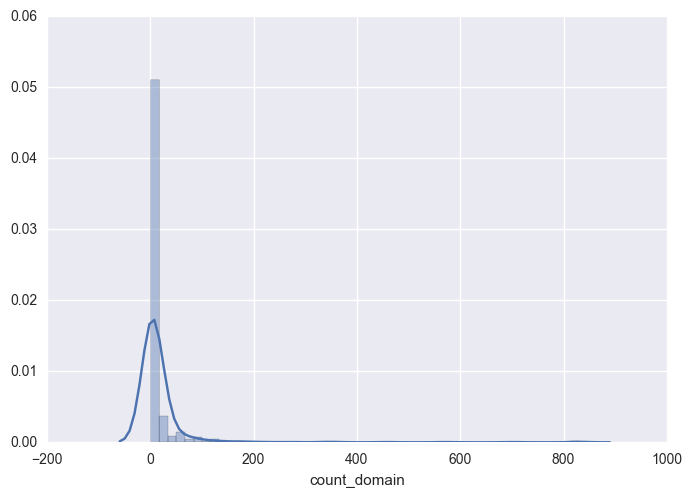

In [31]:
sns.distplot(df_1_dom_count.count_domain)

We will cut the number of pages per domain, we need to decide by what value.

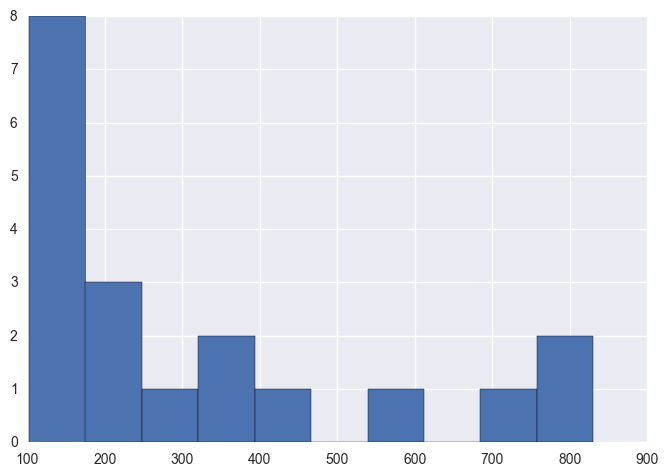

In [32]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain >= 100].hist()

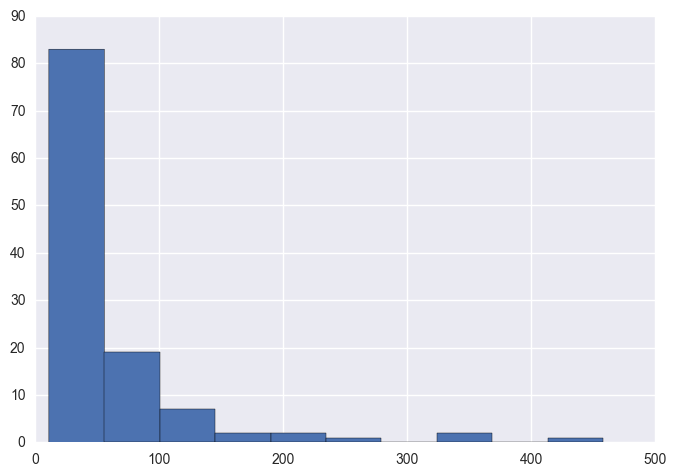

In [33]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain > 10][df_1_dom_count.count_domain < 500].hist()

In [34]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain > 100] = 100

In [35]:
df_1_dom_count.count_domain.sum()

6782

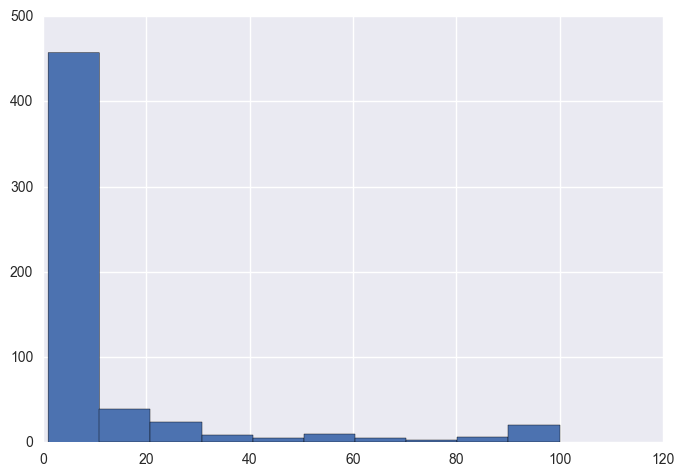

In [36]:
df_1_dom_count.count_domain.hist()

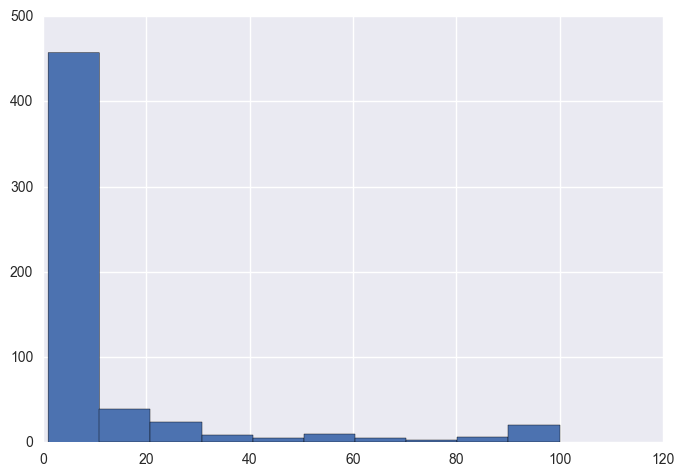

In [37]:
df_1_dom_count.count_domain.hist()

In [38]:
df_1_dom_count = get_df_dom_count(df_1)

In [39]:
df_1_dom_count.head()

,domain,count_domain
0,bucuresteni.ro,100
1,mysunshinecoast.com.au,100
2,hooversun.com,100
3,wku.edu,100
4,livenation.com,100


### Remove those domains which are too frequent

In [40]:
df_1_dom_count_100 = df_1_dom_count.domain[df_1_dom_count.count_domain == 100]

def is_kept(s):
    global df_1_dom_count_100
    c = df_1_dom_count.count_domain[df_1_dom_count.domain == s].values[0]
    if c != 0:
        df_1_dom_count.count_domain[df_1_dom_count.domain == s] = c - 1
        return 1
    else:
        return 0

In [41]:
df_1_100 = df_1[df_1.domain.isin(df_1_dom_count_100)]
df_1_not_100 = df_1[~df_1.domain.isin(df_1_dom_count_100)]

df_1_100.shape, df_1_not_100.shape

((5984, 298), (4882, 298))

In [42]:
# WARNING: time-consuming procedure, we keep the globabl variable df_1_dom_count 
# and stop when there is a limit for this particular domain

df_1_100['keep'] = df_1_100.domain.apply(is_kept)
df_1_not_100['keep'] = 1

In [43]:
df_1_all = pd.concat(axis=0, objs=[df_1_100, df_1_not_100])

In [44]:
df_1_final = df_1_all[df_1_all['keep'] == 1]

In [45]:
df_1_final

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,-webkit-animation-name,-webkit-align-items,page-break-inside,-webkit-grid-auto-rows,-webkit-clip-path,max-height,stroke-width,buffered-rendering,domain,keep
103,http://www.livenation.com/events/155446-oct-26...,startDate,"Friday Oct 26, 2012at09:00 PM CDT",51,481,22,75,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
104,http://www.livenation.com/events/213114-jan-31...,startDate,"Thursday Jan 31, 2013at07:30 PM EST",51,717,22,86,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
105,http://www.livenation.com/events/373699-oct-24...,startDate,"Friday Oct 24, 2014at08:00 PM CDT",51,862,22,83,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
139,http://mysunshinecoast.com.au/events/events-di...,name,DeepBlue Winter Workshops,69,38,55,193,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
140,http://mysunshinecoast.com.au/events/events-di...,startDate,Thursday 10th July 2014,126,399,21,207,time,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
141,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour Civic Centre,\r \r Nambour\r ...",69,467,55,274,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
205,http://mysunshinecoast.com.au/events/events-di...,name,Headspace: meditation for study success,69,38,55,295,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
206,http://mysunshinecoast.com.au/events/events-di...,startDate,Wednesday 12th October 2011,69,399,55,269,time,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
207,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour library,\r \r Nambour\r 4...",149,467,21,230,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
228,http://mysunshinecoast.com.au/events/events-di...,name,African Dance Workshop,69,38,29,278,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1


In [46]:
df_1_dom_count_final = get_df_dom_count(df_1_final)

In [56]:
df_1_final.shape

(6782, 299)

In [47]:
df_1_final[df_1_final.meta_name == 'startDate'].shape

(3223, 299)

In [57]:
%store df_1_final

Stored 'df_1_final' (DataFrame)


Properties of the df_1_final dataset:
  * It is cleaned (without zero - x, y, width, heigt vlues, without meta tags)
  * It containes at most 100 different urls for one domain
  * Every page contains only 1 event, the rest is removed
  * Doesn't contain duplicates by numeric features

In [58]:
df_1_final

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,-webkit-animation-name,-webkit-align-items,page-break-inside,-webkit-grid-auto-rows,-webkit-clip-path,max-height,stroke-width,buffered-rendering,domain,keep
103,http://www.livenation.com/events/155446-oct-26...,startDate,"Friday Oct 26, 2012at09:00 PM CDT",51,481,22,75,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
104,http://www.livenation.com/events/213114-jan-31...,startDate,"Thursday Jan 31, 2013at07:30 PM EST",51,717,22,86,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
105,http://www.livenation.com/events/373699-oct-24...,startDate,"Friday Oct 24, 2014at08:00 PM CDT",51,862,22,83,span,NaN,4,...,none,stretch,auto,auto,none,none,1,auto,livenation.com,1
139,http://mysunshinecoast.com.au/events/events-di...,name,DeepBlue Winter Workshops,69,38,55,193,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
140,http://mysunshinecoast.com.au/events/events-di...,startDate,Thursday 10th July 2014,126,399,21,207,time,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
141,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour Civic Centre,\r \r Nambour\r ...",69,467,55,274,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
205,http://mysunshinecoast.com.au/events/events-di...,name,Headspace: meditation for study success,69,38,55,295,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
206,http://mysunshinecoast.com.au/events/events-di...,startDate,Wednesday 12th October 2011,69,399,55,269,time,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
207,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour library,\r \r Nambour\r 4...",149,467,21,230,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1
228,http://mysunshinecoast.com.au/events/events-di...,name,African Dance Workshop,69,38,29,278,span,NaN,1,...,none,stretch,auto,auto,none,none,1,auto,mysunshinecoast.com.au,1


In [67]:
tags = df_1_final.tag.value_counts().reset_index()

In [71]:
tags.iloc[:,0].values

array(['span', 'time', 'div', 'p', 'h1', 'li', 'h3', 'td', 'h2', 'a',
       'strong', 'h5', 'item', 'dd', 'b', 'tr', 'h4', 'dl', 'address',
       'pre', 'font', 'em', 'header', 'var', 'table', 'abbr'], dtype=object)